<a href="https://colab.research.google.com/github/SESCDS/sescds/blob/master/Part%202/Lesson%204/Lesson4_DenseNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Полносвязная нейросеть </h1> 

Импорт библиотек

In [0]:
# Импорт библиотек и установка random_seed - параметра, который обеспечит воспроизводимость случайных чисел

import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import matplotlib.pyplot as plt
torch.manual_seed(1)

In [0]:
torch.defaut_device = torch.device('cuda:0')

<h2>Вспомним, что было c линейной регрессией:</h2>

Датасет

In [0]:
class Data(Dataset):
  
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.02).view(-1, 1)
        self.f = 1 * self.x - 1 
        self.y = self.f #уберем шум + 0.2 * torch.randn(self.x.size())
        self.len = self.x.shape[0] 
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [0]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 10)

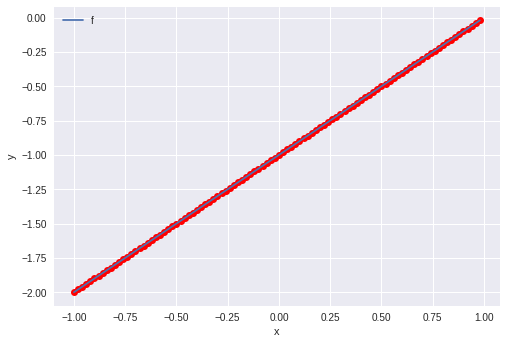

In [0]:
plt.plot(dataset.x.numpy(), dataset.y.numpy(), 'ro')
plt.plot(dataset.x.numpy(), dataset.f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Архитектура

In [0]:
class linear_regression(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__() 
        
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [0]:
model = linear_regression(input_size = 1, output_size=1)

Фкнкция ошибок и оптимизатор

In [0]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.03)

Обучение модели

In [0]:
def train_model_BGD(num_epochs):
    for epoch in range(num_epochs):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(loss.item())

In [0]:
train_model_BGD(30)

0.5528286099433899
0.3921942412853241
0.27073103189468384
0.18370993435382843
0.12330406159162521
0.08217803388834
0.05451812222599983
0.03605974093079567
0.023804038763046265
0.015693416818976402
0.01033750083297491
0.006805678363889456
0.004478837363421917
0.0029468482825905085
0.0019385613268241286
0.0012751310132443905
0.0008386850240640342
0.0005516022793017328
0.0003627767146099359
0.00023858368513174355
0.00015690266445744783
0.00010318865679437295
6.786189624108374e-05
4.462817378225736e-05
2.9348626412684098e-05
1.930024336616043e-05
1.2692615200649016e-05
8.346777576662134e-06
5.4890665523998905e-06
3.6096384974371176e-06


Видим, что без шума ошибка становится очень маленькой, то есть модель идеально описывает данные

<h2>Изменим данные - нелинейная функция</h2>

In [0]:
class Data_nonlinear(Dataset):
  
    def __init__(self):
        # Ваша функция
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [0]:
dataset = Data_nonlinear()
trainloader = DataLoader(dataset = dataset, batch_size = 10)

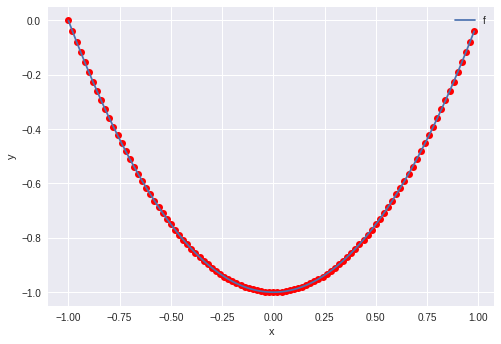

In [0]:
plt.plot(dataset.x.numpy(), dataset.y.numpy(), 'ro')
plt.plot(dataset.x.numpy(), dataset.f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [0]:
model = linear_regression(input_size = 1, output_size=1)
optimizer = optim.SGD(model.parameters(), lr = 0.03)

In [0]:
def train_model_BGD(num_epochs, verbose=1):
    for epoch in range(num_epochs):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if (epoch==num_epochs-1) | (epoch % verbose == 0):
          print(epoch, loss.item())

In [0]:
train_model_BGD(30)

0 0.3206266462802887
1 0.039422571659088135
2 0.009123657830059528
3 0.03890708461403847
4 0.07619519531726837
5 0.10843869298696518
6 0.13406936824321747
7 0.154088094830513
8 0.1697772592306137
9 0.18218591809272766
10 0.19208969175815582
11 0.20005132257938385
12 0.20648407936096191
13 0.211698517203331
14 0.21593347191810608
15 0.2193763256072998
16 0.22217637300491333
17 0.22445379197597504
18 0.2263057678937912
19 0.22781147062778473
20 0.2290351539850235
21 0.23002950847148895
22 0.2308371663093567
23 0.23149298131465912
24 0.23202550411224365
25 0.23245766758918762
26 0.2328084409236908
27 0.23309312760829926
28 0.23332400619983673
29 0.23351140320301056


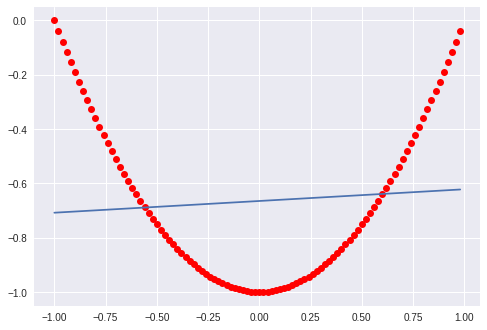

In [0]:
w1 = model.state_dict()['linear.weight'][0].item()
w0 = model.state_dict()['linear.bias'][0].item()
x = dataset.x.numpy()
y = dataset.y.numpy()
y_hat = w0 + w1*dataset.x.numpy()

plt.plot(x, y, 'ro', label = "training points")
plt.plot(x, y_hat, label = "estimated line")

<h1>Наконец, полноценная нейросеть!</h1>

In [0]:
class one_hidden_layer_model(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(one_hidden_layer_model, self).__init__() 
        
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.nonlinearity = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        yhat = self.linear1(x)
        yhat = self.nonlinearity(yhat)
        yhat = self.linear2(yhat)
        return yhat

In [0]:
model = one_hidden_layer_model(input_size = 1, hidden_size = 20, output_size=1)
optimizer = optim.SGD(model.parameters(), lr = 0.03)

In [0]:
train_model_BGD(1000, verbose=100)

0 0.46971359848976135
100 0.008617528714239597
200 0.0032446892000734806
300 0.0018114320700988173
400 0.0011408057762309909
500 0.0007713237428106368
600 0.0005643829354085028
700 0.00043348700273782015
800 0.0003475635312497616
900 0.0002858368679881096
999 0.00024967972422018647


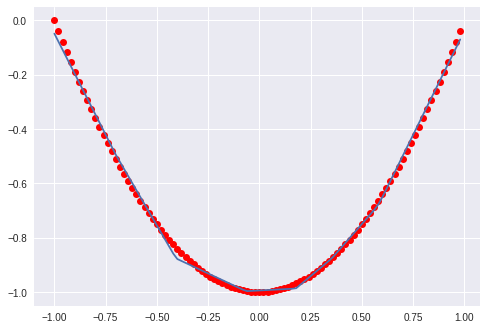

In [0]:
x = dataset.x.numpy()
y = dataset.y.numpy()
yhat = model(dataset.x)
y_hat = yhat.detach().numpy()
plt.plot(x, y, 'ro', label = "training points")
plt.plot(x, y_hat, label = "estimated line")

<h1>Классификация картинок</h1>

In [0]:
import torchvision
import torchvision.transforms as transforms

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
bs = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=bs,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=bs,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


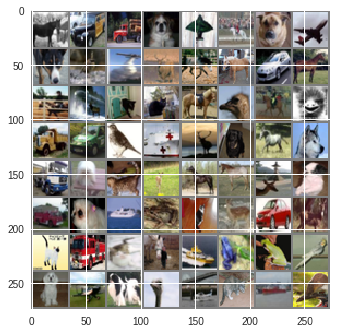

horse   car truck   dog


In [0]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
class linear_image_classifier(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(linear_image_classifier, self).__init__() 
        
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        yhat = self.linear(x)
        return yhat

In [0]:
image_clf = linear_image_classifier(3072,10)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(image_clf.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = image_clf(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 2.085
[1,   100] loss: 1.933
[1,   150] loss: 1.905
[1,   200] loss: 1.859
[1,   250] loss: 1.831
[1,   300] loss: 1.817
[1,   350] loss: 1.824
[1,   400] loss: 1.821
[1,   450] loss: 1.823
[1,   500] loss: 1.819
[1,   550] loss: 1.802
[1,   600] loss: 1.813
[1,   650] loss: 1.781
[1,   700] loss: 1.790
[1,   750] loss: 1.779
[2,    50] loss: 1.771
[2,   100] loss: 1.742
[2,   150] loss: 1.794
[2,   200] loss: 1.756
[2,   250] loss: 1.758
[2,   300] loss: 1.745
[2,   350] loss: 1.769
[2,   400] loss: 1.754
[2,   450] loss: 1.747
[2,   500] loss: 1.766
[2,   550] loss: 1.748
[2,   600] loss: 1.706
[2,   650] loss: 1.766
[2,   700] loss: 1.757
[2,   750] loss: 1.749
Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = image_clf(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 40 %


In [0]:
class one_layer_image_classifier(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(one_layer_image_classifier, self).__init__() 
        #Здесь задайте слои
        
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        #Здесь проход по слоям
        return yhat

In [0]:
image_clf = one_layer_image_classifier(3072,3072,10)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(image_clf.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = image_clf(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 2.209
[1,   100] loss: 2.052
[1,   150] loss: 1.973
[1,   200] loss: 1.898
[1,   250] loss: 1.880
[1,   300] loss: 1.852
[1,   350] loss: 1.817
[1,   400] loss: 1.798
[1,   450] loss: 1.771
[1,   500] loss: 1.752
[1,   550] loss: 1.726
[1,   600] loss: 1.722
[1,   650] loss: 1.705
[1,   700] loss: 1.726
[1,   750] loss: 1.705
[2,    50] loss: 1.669
[2,   100] loss: 1.647
[2,   150] loss: 1.653
[2,   200] loss: 1.636
[2,   250] loss: 1.645
[2,   300] loss: 1.657
[2,   350] loss: 1.630
[2,   400] loss: 1.627
[2,   450] loss: 1.636
[2,   500] loss: 1.619
[2,   550] loss: 1.615
[2,   600] loss: 1.609
[2,   650] loss: 1.579
[2,   700] loss: 1.583
[2,   750] loss: 1.589
Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = image_clf(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 45 %
